In [ ]:
# Analyzes relationships between points and potential features for model

In [1]:
#Import Packages
import pandas as pd
import numpy as np
from Player.Players import Players
from Regression.Reg_Model import Reg_Model

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# Analyze Player's past points, assists, and minutes
Player_List = Players('2015-16').players

In [13]:
all_stats=pd.DataFrame()
all_game_logs=pd.DataFrame()

for key in Player_List:
    p=Player_List[key]
    game_logs = p.game_logs
    game_logs['PTS_MIN'] = [x*1.0/y for x,y in zip(game_logs['PTS'], game_logs['MIN'])]
    
    all_game_logs = all_game_logs.append(game_logs)
    
    stats = Player_List[key].get_stats(game_logs = game_logs, date_col='GAME_DATE', 
                                       id_col='Game_ID', target_col='PTS', 
                                       col_list=['PTS', 'MIN', 'PTS_MIN', 'AST', 'FGM', 'FGA', 'FG_PCT'], n=10)
    if len(stats>0):
        stats=stats[stats['n_games']>=5]
    
    all_stats = all_stats.append(stats)

In [5]:
cor = pd.DataFrame()
feature_list = ['PTS_avg_10', 'AST_avg_10', 'PTS_MIN_avg_10']
for f in feature_list:
    cor.set_value('PTS', f, np.corrcoef(x=stats[f], y=stats['PTS'])[0,1])
cor

,PTS_avg_10,AST_avg_10,PTS_MIN_avg_10
Correlation,0.116314,-0.042724,0.135762


<function matplotlib.pyplot.show>

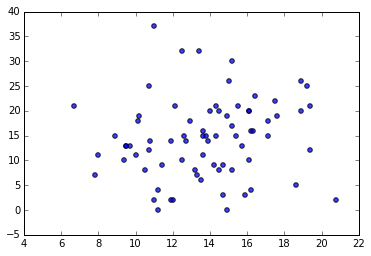

In [7]:
%matplotlib inline
x=stats['PTS_avg_10']
y=stats['PTS']
import matplotlib.pyplot as plt
plt.scatter(x, y, alpha=0.5)
plt.show

<function matplotlib.pyplot.show>

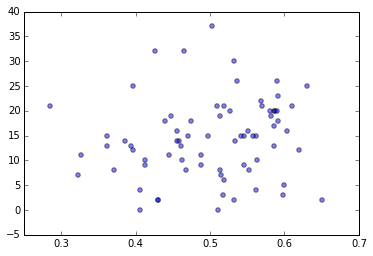

In [8]:
%matplotlib inline
x=stats['PTS_MIN_avg_10']
y=stats['PTS']
import matplotlib.pyplot as plt
plt.scatter(x, y, alpha=0.5)
plt.show

In [3]:
# Looks at team's past performance using ELO
from Regression.ELO import ELO
from Schedule.Schedule import Schedule
sched_2014 = Schedule(b_dt = '10/1/2014')
sched_2015 = Schedule(b_dt = '10/1/2015')
games = sched_2014.get_games().append(sched_2015.get_games()).reset_index(drop=True)
elo = ELO(games, 'GAME_DATE', 'Home Team', 'Away Team', 'H_PTS', 'A_PTS')
elo_data = elo.create_elo(1500, 20, 100, '538')



In [10]:
# Joins ELO data back to games
for index, game in games.iterrows():
    game_dt = game['GAME_DATE']
    poss_elo = elo_data[elo_data.index < game_dt]
    
    h_team = game['Home Team']
    if len(poss_elo) == 0:
        h_elo_score = 1500
    else:
        h_elo_score = poss_elo.tail(1)[h_team][0]
    games.set_value(index, 'H_ELO', h_elo_score)
    
    a_team = game['Away Team']
    if len(poss_elo) == 0:
        a_elo_score = 1500
    else:
        a_elo_score = poss_elo.tail(1)[a_team][0]
    games.set_value(index, 'A_ELO', a_elo_score)

In [12]:
elo_data

,MIL,GSW,MIN,MIA,ATL,BOS,DET,NYK,DEN,DAL,...,WAS,LAL,PHI,MEM,LAC,SAC,ORL,PHX,IND,NOP
2014-10-28,1500,1500,1500,1500,1500,1500,1500,1500,1500,1499.56,...,1500,1501.41,1500,1500,1500,1500,1498.41,1500,1500,1501.59
2014-10-29,1499.47,1498.59,1499.31,1501.26,1499.09,1501.53,1498.87,1501.72,1501.13,1499.56,...,1498.74,1499.63,1498.74,1500.69,1500,1501.41,1498.41,1501.78,1501.26,1501.59
2014-10-30,1499.47,1498.59,1500.15,1501.26,1499.09,1501.53,1498.03,1501.07,1501.13,1501.22,...,1497.96,1499.63,1498.74,1500.69,1500.61,1501.41,1499.19,1501.78,1501.26,1501.59
2014-10-31,1500.74,1498.59,1500.15,1501.26,1499.09,1501.53,1498.03,1501.07,1501.13,1501.22,...,1497.96,1500.41,1497.47,1499.85,1499.83,1502.47,1499.19,1502.55,1502.11,1501.59
2014-11-01,1499.54,1500.56,1500.53,1499.86,1500.22,1500.13,1499.11,1501.07,1499.93,1500.57,...,1499.16,1498.44,1498.88,1499.4,1499.83,1502.47,1500.32,1500.34,1500.97,1502.24
2014-11-02,1499.54,1499.91,1500.53,1500.62,1500.22,1500.13,1499.11,1501.68,1499.93,1500.57,...,1499.16,1498.44,1498.88,1499.4,1500.54,1501.75,1500.32,1500.34,1500.97,1502.24
2014-11-03,1499.54,1499.91,1500.53,1500.62,1500.22,1499.36,1499.11,1501.68,1500.58,1501.33,...,1499.16,1498.44,1499.9,1500.67,1501.38,1501.1,1500.32,1500.34,1500.97,1500.98
2014-11-04,1498.82,1499.91,1500.53,1501.98,1500.22,1499.36,1499.11,1502.93,1500.58,1501.33,...,1497.91,1499.15,1499.9,1500.67,1501.38,1501.1,1499.33,1499.62,1501.69,1502.03
2014-11-05,1499.72,1501.5,1499.75,1501.07,1499.69,1499.88,1499.72,1502.32,1498.68,1501.33,...,1498.43,1499.15,1500.34,1499.65,1499.79,1503.01,1498.88,1500.64,1501.16,1502.03
2014-11-06,1499.72,1501.5,1499.75,1501.07,1499.69,1499.88,1499.72,1502.32,1498.68,1499.49,...,1498.43,1499.15,1500.34,1499.65,1499.79,1503.01,1498.88,1500.64,1501.16,1502.03


In [15]:
# Joins Player data and ELO data
game_logs

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PTS_MIN
5047,22015.0,2037.0,21501196.0,2016-04-10,LAC vs. DAL,W,26.0,7.0,13.0,0.538,...,1.0,2.0,1.0,0.0,2.0,1.0,22.0,6.0,1.0,0.846154
5048,22015.0,2037.0,21501187.0,2016-04-08,LAC @ UTA,W,49.0,9.0,20.0,0.450,...,5.0,4.0,1.0,1.0,1.0,3.0,30.0,6.0,1.0,0.612245
5049,22015.0,2037.0,21501164.0,2016-04-05,LAC vs. LAL,W,18.0,2.0,6.0,0.333,...,0.0,1.0,1.0,0.0,3.0,2.0,4.0,-5.0,1.0,0.222222
5050,22015.0,2037.0,21501147.0,2016-04-03,LAC vs. WAS,W,25.0,6.0,12.0,0.500,...,4.0,6.0,0.0,0.0,2.0,2.0,19.0,1.0,1.0,0.760000
5051,22015.0,2037.0,21501126.0,2016-03-31,LAC @ OKC,L,40.0,10.0,20.0,0.500,...,1.0,7.0,2.0,1.0,3.0,0.0,32.0,-9.0,1.0,0.800000
5052,22015.0,2037.0,21501116.0,2016-03-30,LAC @ MIN,W,18.0,3.0,6.0,0.500,...,2.0,1.0,2.0,0.0,0.0,0.0,10.0,15.0,1.0,0.555556
5053,22015.0,2037.0,21501106.0,2016-03-28,LAC vs. BOS,W,29.0,5.0,12.0,0.417,...,2.0,2.0,1.0,0.0,3.0,2.0,15.0,19.0,1.0,0.517241
5054,22015.0,2037.0,21501092.0,2016-03-27,LAC vs. DEN,W,21.0,3.0,8.0,0.375,...,1.0,2.0,0.0,0.0,1.0,0.0,14.0,1.0,1.0,0.666667
5055,22015.0,2037.0,21501072.0,2016-03-24,LAC vs. POR,W,33.0,11.0,21.0,0.524,...,1.0,2.0,1.0,0.0,1.0,2.0,25.0,11.0,1.0,0.757576
5056,22015.0,2037.0,21501066.0,2016-03-23,LAC @ GSW,L,32.0,4.0,11.0,0.364,...,1.0,6.0,2.0,1.0,2.0,1.0,12.0,-4.0,1.0,0.375000


In [29]:
for index, g in game_logs.iterrows():
    elo=elo_data.ix[str(g['GAME_DATE'])[0:10], g['MATCHUP'][0:3]]
    game_logs.set_value(index, 'ELO', elo)
    opp_team = g['MATCHUP'].split(' ')[2]
    opp_elo = elo_data.ix[str(g['GAME_DATE'])[0:10], opp_team]
    game_logs.set_value(index, 'Opp_ELO', opp_elo)

In [30]:
game_logs

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PTS_MIN,ELO,Opp_ELO
5047,22015.0,2037.0,21501196.0,2016-04-10,LAC vs. DAL,W,26.0,7.0,13.0,0.538,...,1.0,0.0,2.0,1.0,22.0,6.0,1.0,0.846154,1506.203334,1502.918644
5048,22015.0,2037.0,21501187.0,2016-04-08,LAC @ UTA,W,49.0,9.0,20.0,0.450,...,1.0,1.0,1.0,3.0,30.0,6.0,1.0,0.612245,1505.290061,1502.755171
5049,22015.0,2037.0,21501164.0,2016-04-05,LAC vs. LAL,W,18.0,2.0,6.0,0.333,...,1.0,0.0,3.0,2.0,4.0,-5.0,1.0,0.222222,1506.754021,1487.939780
5050,22015.0,2037.0,21501147.0,2016-04-03,LAC vs. WAS,W,25.0,6.0,12.0,0.500,...,0.0,0.0,2.0,2.0,19.0,1.0,1.0,0.760000,1504.875337,1500.849317
5051,22015.0,2037.0,21501126.0,2016-03-31,LAC @ OKC,L,40.0,10.0,20.0,0.500,...,2.0,1.0,3.0,0.0,32.0,-9.0,1.0,0.800000,1504.112064,1513.980489
5052,22015.0,2037.0,21501116.0,2016-03-30,LAC @ MIN,W,18.0,3.0,6.0,0.500,...,2.0,0.0,0.0,0.0,10.0,15.0,1.0,0.555556,1504.633266,1491.142520
5053,22015.0,2037.0,21501106.0,2016-03-28,LAC vs. BOS,W,29.0,5.0,12.0,0.417,...,1.0,0.0,3.0,2.0,15.0,19.0,1.0,0.517241,1506.131658,1506.932634
5054,22015.0,2037.0,21501092.0,2016-03-27,LAC vs. DEN,W,21.0,3.0,8.0,0.375,...,0.0,0.0,1.0,0.0,14.0,1.0,1.0,0.666667,1504.098910,1485.542378
5055,22015.0,2037.0,21501072.0,2016-03-24,LAC vs. POR,W,33.0,11.0,21.0,0.524,...,1.0,0.0,1.0,2.0,25.0,11.0,1.0,0.757576,1502.655161,1502.954729
5056,22015.0,2037.0,21501066.0,2016-03-23,LAC @ GSW,L,32.0,4.0,11.0,0.364,...,2.0,1.0,2.0,1.0,12.0,-4.0,1.0,0.375000,1502.129341,1518.419100


<function matplotlib.pyplot.show>

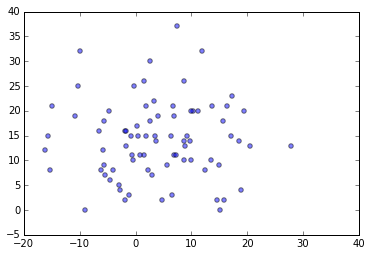

In [33]:
%matplotlib inline
x=[a-b for a,b in zip(game_logs['ELO'],game_logs['Opp_ELO'])]
y=game_logs['PTS']
import matplotlib.pyplot as plt
plt.scatter(x, y, alpha=0.5)
plt.show

In [34]:
np.corrcoef(x, y)[0,1]

0.010461537940688593

In [ ]:
#Trying to get points per team
home_games = games[['GAME_DATE', 'Home Team', 'H_PTS']].rename({'Home Team': 'Team', 'H_PTS': 'PTS'})
away_games = games[['GAME_DATE', 'Away Team', 'A_PTS']].rename({'Away Team': 'Team', 'A_PTS': 'PTS'})
game_stats = home_games.append(away_games).reset_index(drop=True)
print len(games), len(home_games), len(away_games), len(game_stats)


In [15]:
from Schedule.Stats import Stats
my_team_stats = Stats(games, 'avg', 'GAME_DATE', 'Home Team', 'Away Team', 'Pts_diff', ['Game_ID', 'Home Team', 'Away Team'])
last_10_team_stats = my_team_stats.get_lastn_stats(10)

In [14]:
games.columns

Index([u'GAME_DATE', u'Game_ID', u'H_WL', u'A_WL', u'Home Team', u'Away Team',
       u'H_PTS', u'A_PTS', u'Pts_diff', u'FGM_home', u'FG3M_home', u'FGA_home',
       u'OREB_home', u'DREB_away', u'TOV_home', u'FTM_home', u'FTA_home',
       u'FGM_away', u'FG3M_away', u'FGA_away', u'OREB_away', u'DREB_home',
       u'TOV_away', u'FTM_away', u'FTA_away', u'H_AST', u'A_AST', u'H_STL',
       u'A_STL', u'H_BLK', u'A_BLK', u'H_FF_EFG', u'H_FF_ORB', u'H_FF_FTFGA',
       u'H_FF_TOV', u'A_FF_EFG', u'A_FF_ORB', u'A_FF_FTFGA', u'A_FF_TOV'],
      dtype='object')

In [16]:
last_10_team_stats.to_csv('tstats.csv', index=False)
game_logs.to_csv('gl.csv', index=False)
                    
                    # I need to plan this merge out--probably will need join home and away separately

In [ ]:
cor = pd.DataFrame()
feature_list = ['PTS_avg_10', 'AST_avg_10', 'PTS_MIN_avg_10']
for f in feature_list:
    cor.set_value('PTS', f, np.corrcoef(x=stats[f], y=stats['PTS'])[0,1])
cor